In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [3]:
!head ../nso-lsof.log

Thu May 27 00:53:19 EDT 2021 -- File Descriptors ncs  : 365
Thu May 27 00:53:19 EDT 2021 -- File Descriptors 4260 : 430
Thu May 27 00:53:19 EDT 2021 -- File Descriptors 4638 : 73
Thu May 27 00:53:41 EDT 2021 -- File Descriptors ncs  : 365
Thu May 27 00:53:41 EDT 2021 -- File Descriptors 4260 : 428
Thu May 27 00:53:42 EDT 2021 -- File Descriptors 4638 : 73
Thu May 27 00:53:57 EDT 2021 -- File Descriptors ncs  : 365
Thu May 27 00:53:57 EDT 2021 -- File Descriptors 4260 : 428
Thu May 27 00:53:57 EDT 2021 -- File Descriptors 4638 : 73
Thu May 27 00:54:12 EDT 2021 -- File Descriptors ncs  : 365


In [4]:
!awk '/File Descriptors ncs/' ../nso-lsof.log > 1.log
!awk '/File Descriptors 4260/' ../nso-lsof.log > 2.log
!awk '/File Descriptors 4638/' ../nso-lsof.log > 3.log

In [35]:
df = pd.read_csv('2.log', sep=':|--', engine='python', header=None, skipinitialspace=True)

df.head()

,0,1,2,3,4
0,Thu May 27 00,53,19 EDT 2021,File Descriptors 4260,430
1,Thu May 27 00,53,41 EDT 2021,File Descriptors 4260,428
2,Thu May 27 00,53,57 EDT 2021,File Descriptors 4260,428
3,Thu May 27 00,54,12 EDT 2021,File Descriptors 4260,428
4,Thu May 27 00,54,27 EDT 2021,File Descriptors 4260,428


In [36]:
df['date'] = df[0] + ":" + df[1].apply(str) + ":" + df[2]
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.rename(columns = {4:'num'})
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18153 entries, 0 to 18152
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                                 
---  ------  --------------  -----                                 
 0   0       18153 non-null  object                                
 1   1       18153 non-null  int64                                 
 2   2       18153 non-null  object                                
 3   3       18153 non-null  object                                
 4   num     18153 non-null  int64                                 
 5   date    18153 non-null  datetime64[ns, pytz.FixedOffset(-240)]
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int64(2), object(3)
memory usage: 851.0+ KB


In [37]:
df.head()

,0,1,2,3,num,date
0,Thu May 27 00,53,19 EDT 2021,File Descriptors 4260,430,2021-05-27 00:53:19-04:00
1,Thu May 27 00,53,41 EDT 2021,File Descriptors 4260,428,2021-05-27 00:53:41-04:00
2,Thu May 27 00,53,57 EDT 2021,File Descriptors 4260,428,2021-05-27 00:53:57-04:00
3,Thu May 27 00,54,12 EDT 2021,File Descriptors 4260,428,2021-05-27 00:54:12-04:00
4,Thu May 27 00,54,27 EDT 2021,File Descriptors 4260,428,2021-05-27 00:54:27-04:00


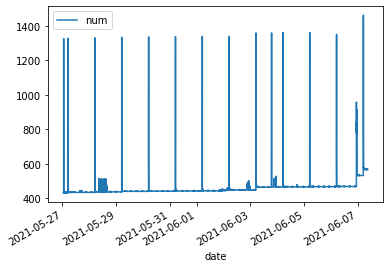

In [38]:
p_all = df.plot.line(x='date', y='num')

In [20]:
p_all.get_figure().savefig('java_4260_all.pdf')

In [40]:
df['num'].describe()

count    18153.000000
mean       454.686774
std         59.920519
min        428.000000
25%        436.000000
50%        442.000000
75%        465.000000
max       1462.000000
Name: num, dtype: float64

In [41]:
df['num'].value_counts()

433     2161
441     1410
465     1393
466     1366
439     1353
        ... 
1090       1
1321       1
777        1
569        1
499        1
Name: num, Length: 175, dtype: int64

In [42]:
df_mod=df[df['num'].between(300, 600)]
#df_mod=df[df['num'].between(1, 455)]

df_mod['num'].describe()

count    18044.000000
mean       450.651962
std         22.139111
min        428.000000
25%        436.000000
50%        442.000000
75%        465.000000
max        587.000000
Name: num, dtype: float64

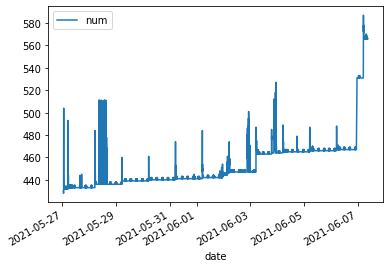

In [43]:
p = df_mod.plot.line(x='date', y='num')

In [25]:
p.get_figure().savefig('ncs_java_4260_zoom.pdf')